## 과제27 python 기반으로 wordcloud 구현하기

- 한글 글자체 정보가 없어서 한글이 깨져서나옴
- 해결 Font정보 c:\windows\fonts 모든 글자체정보가 존재
- 이 글자체 정보파일이 있는 경로(path)정보를 환경설정정보로 
- matplotlib에 전달만 해주면 출력가능

In [51]:
import codecs
from bs4 import BeautifulSoup

### text가져오기

In [57]:
fp = codecs.open('/py_data/BEXX0003.txt',"r",encoding="utf-16")
soup = BeautifulSoup(fp, 'html.parser')
body = soup.select_one('body > text') # body에 html태그들도 다 같이 있다. 텍스트만 가져오고싶으면 getText()
text = body.getText()

In [59]:
print(text)


제1편 어둠의 발소리
서(序)
1897년의 한가위.
까치들이 울타리 안 감나무에 와서 아침 인사를 하기도 전에, 무색 옷에 댕기꼬리를 늘인 아이들은 송편을 입에 물고 마을길을 쏘다니며 기뻐서 날뛴다. 어른들은 해가 중천에서 좀 기울어질 무렵이래야, 차례를 치러야 했고 성묘를 해야 했고 이웃끼리 음식을 나누다 보면 한나절은 넘는다. 이때부터 타작마당에 사람들이 모이기 시작하고 들뜨기 시작하고 -- 남정네 노인들보다 아낙들의 채비는 아무래도 더디어지는데 그럴 수밖에 없는 것이 식구들 시중에 음식 간수를 끝내어도 제 자신의 치장이 남아 있었으니까. 이 바람에 고개가 무거운 벼이삭이 황금빛 물결을 이루는 들판에서는, 마음놓은 새떼들이 모여들어 풍성한 향연을 벌인다.
"후우이이 -- 요놈의 새떼들아!"  극성스럽게 새를 쫓던 할망구는 와삭와삭 풀발이 선 출입옷으로 갈아입고 타작마당에서 굿을 보고 있을 것이다. 추석은 마을의 남녀노유, 사람들에게뿐만 아니라 강아지나 돼지나 소나 말이나 새들에게, 시궁창을 드나드는 쥐새끼까지 포식의 날인가 보다.
빠른 장단의 꽹과리 소리, 느린 장단의 둔중한 여음으로 울려퍼지는 징 소리는 타작마당과 거리가 먼 최참판댁 사랑에서는 흐느낌같이 슬프게 들려온다. 농부들은 지금 꽃 달린 고깔을 흔들면서 신명을 내고 괴롭고 한스러운 일상(日常)을 잊으며 굿놀이에 열중하고 있을 것이다. 최참판댁에서 섭섭찮게 전곡(錢穀)이 나갔고, 풍년에는 미치지 못했으나 실한 평작임엔 틀림이 없을 것인즉 모처럼 허리끈을 풀어놓고 쌀밥에 식구들은 배를 두드렸을 테니 하루의 근심은 잊을 만했을 것이다.
이날은 수수개비를 꺾어도 아이들은 매를 맞지 않는다. 여러 달 만에 솟증(素症) 풀었다고 느긋해하던 늙은이들은 뒷간 출입이 잦아진다. 힘 좋은 젊은이들은 벌써 읍내에 가고 없었다. 황소 한 마리 끌고 돌아오는 꿈을 꾸며 읍내 씨름판에 몰려간 것이다.
최참판댁 사랑은 무인지경처럼 적막하다. 햇빛은 맑게 뜰을 비쳐주는데 사람들은 모두 어디로 가버렸을까. 새로 바른 방문 장

### 문서를 문장단위로 분리하자

In [63]:
from konlpy.tag import Twitter

In [66]:
twitter = Twitter()
lines = text.split('\n') 
# print(type(lines)) # return list
# print(lines)

<class 'list'>


### 문장에서 명사만 추출

In [68]:
print(lines[1])
print(twitter.pos(lines[1]))

제1편 어둠의 발소리
[('제', 'Noun'), ('1', 'Number'), ('편', 'Noun'), ('어둠', 'Noun'), ('의', 'Josa'), ('발', 'Noun'), ('소리', 'Noun')]


In [93]:
word_dict = dict()

for line in lines:
    malist = twitter.pos(line)
    for word in malist:
        if word[1] =='Noun' and len(word[0]) >= 2: # 2글자 이상의 명사
            try:
                word_dict[word[0]] += 1
            except:
                word_dict[word[0]] = 1


In [94]:
word_dict

{'어둠': 20,
 '소리': 196,
 '한가위': 4,
 '까치': 4,
 '울타리': 30,
 '감나무': 3,
 '아침': 17,
 '인사': 17,
 '무색': 1,
 '댕기': 13,
 '꼬리': 8,
 '아이': 88,
 '송편': 1,
 '마을': 111,
 '어른': 30,
 '중천': 3,
 '무렵': 16,
 '래야': 11,
 '차례': 3,
 '성묘': 1,
 '이웃': 8,
 '끼리': 7,
 '음식': 6,
 '한나절': 1,
 '마당': 51,
 '사람': 167,
 '이기': 16,
 '시작': 29,
 '남정': 9,
 '노인': 14,
 '아낙': 38,
 '채비': 4,
 '식구': 8,
 '시중': 1,
 '간수': 1,
 '자신': 28,
 '치장': 1,
 '남아': 8,
 '바람': 72,
 '고개': 24,
 '이삭': 1,
 '황금': 3,
 '물결': 3,
 '들판': 28,
 '마음': 64,
 '향연': 1,
 '이이': 2,
 '극성': 1,
 '할망구': 8,
 '와삭': 2,
 '풀발': 1,
 '출입': 4,
 '보고': 69,
 '추석': 1,
 '남녀': 5,
 '노유': 1,
 '강아지': 11,
 '돼지': 5,
 '소나': 12,
 '시궁창': 1,
 '새끼': 21,
 '포식': 1,
 '날인': 1,
 '장단': 7,
 '꽹과리': 8,
 '여음': 1,
 '거리': 38,
 '참판': 82,
 '사랑': 52,
 '흐느낌': 1,
 '농부': 16,
 '지금': 45,
 '고깔': 2,
 '신명': 2,
 '일상': 1,
 '열중': 1,
 '섭섭찮': 1,
 '전곡': 1,
 '풍년': 2,
 '평작': 1,
 '틀림': 5,
 '모처럼': 1,
 '허리': 29,
 '쌀밥': 1,
 '하루': 7,
 '근심': 9,
 '개비': 4,
 '여러': 12,
 '늙은이': 13,
 '뒷간': 5,
 '젊은이': 9,
 '벌써': 21,
 '읍내': 34,
 '황소': 4,
 '마리': 2

### string을 그대로 사용하여 wordcloud구현

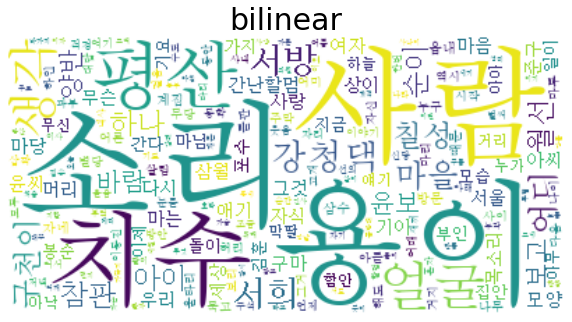

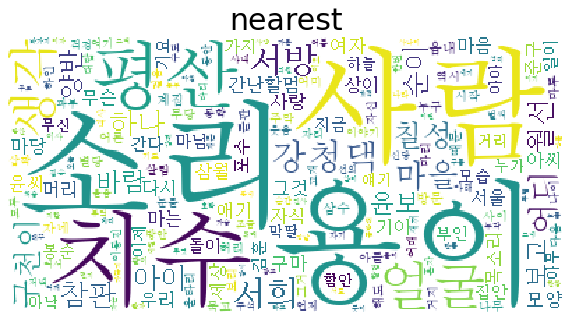

In [108]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
# 실행한 브라우저에서 바로 볼 수 있게 해준다
%matplotlib inline 

font_path = 'C:/Windows/Fonts/batang.ttc'
wordcloud = WordCloud(font_path=font_path, max_font_size=100, background_color='white')
wordcloud.generate_from_frequencies(word_dict)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear') # interplotation=보간법. 16가지가 있음.
plt.axis('off') # axis를 없앤다.
plt.title('bilinear',fontsize=30)
plt.show()


plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='nearest') # interplotation=보간법. 16가지가 있음.
plt.axis('off')
plt.title('nearest',fontsize=30)
plt.show()